Assignment 3

CS 6320.001

Link to Dataset Used: https://www.kaggle.com/datasets/tanishqdublish/text-classification-documentation

Contains labels for five different categories : 0,1,2,3,4

Politics = 0
Sport = 1
Technology = 2
Entertainment =3
Business = 4

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


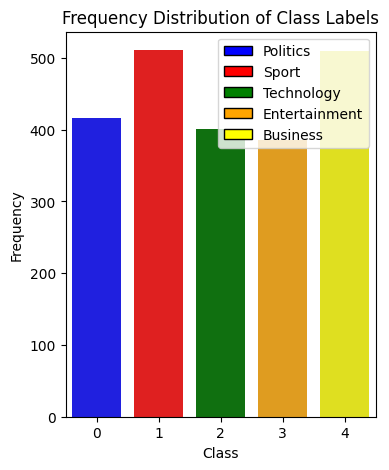

In [135]:
#Handle Imports and Downloads
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

import sklearn
import nltk
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Output Data that was Read in.
classification_data_file = "df_file.csv"
classification_df = pd.read_csv(classification_data_file)

columns = classification_df.columns.tolist()
split_random_state = np.random.randint(1000)

X = classification_df['Text']
y = classification_df['Label']

stop_words = stopwords.words('english')

X = X.apply(lambda x: x.lower())
X = X.apply(lambda x: word_tokenize(x))
X = X.apply(lambda x: list(filter(lambda y: y not in stop_words, x)))
X = X.apply(lambda x: list(filter(lambda y: y.isalpha(), x)))
X = X.apply(lambda x: " ".join(x))

class_counts = classification_df['Label'].value_counts()
colors = ['blue', 'red', 'green', 'orange', 'yellow']
legend_mapping = {
    0 : "Politics",
    1 : "Sport",
    2 : "Technology",
    3 : "Entertainment",
    4 : "Business",
}

plt.figure(figsize=(4, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors, hue=class_counts.index)

plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Labels')

legend_elements = [Patch(facecolor=color, edgecolor='black', label=f'{legend_mapping[index]}') for index, color in enumerate(colors)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()


In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X.tolist())
X_tfidf_array = X_tfidf.toarray()
vectorized_X = pd.DataFrame(X_tfidf_array)

X_train, X_test, y_train, y_test = train_test_split(vectorized_X, y, test_size=0.2, random_state=split_random_state)

# 1. Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_train_predictions = nb_classifier.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Training Accuracy:", nb_train_accuracy)
print("Naive Bayes Testing Accuracy:", nb_accuracy)

# 2. Logistic Regression Classifier
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train, y_train)
lr_predictions = lr_classifier.predict(X_test)
lr_train_predictions = lr_classifier.predict(X_train)
lr_train_accuracy = accuracy_score(y_train, lr_train_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Training Accuracy:", lr_train_accuracy)
print("Logistic Regression Testing Accuracy:", lr_accuracy)


# 3. Neural Network Classifier
nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)
nn_classifier.fit(X_train, y_train)
nn_predictions = nn_classifier.predict(X_test)
nn_train_predictions = nn_classifier.predict(X_train)
nn_train_accuracy = accuracy_score(y_train, nn_train_predictions)
nn_accuracy = accuracy_score(y_test, nn_predictions)
print("Neural Network Training Accuracy:{:.16f}".format(float(nn_train_accuracy)))
print("Neural Network Testing Accuracy:", nn_accuracy)



Naive Bayes Training Accuracy: 0.9887640449438202
Naive Bayes Testing Accuracy: 0.9685393258426966
Logistic Regression Training Accuracy: 0.996629213483146
Logistic Regression Testing Accuracy: 0.9775280898876404
Neural Network Training Accuracy:1.0000000000000000
Neural Network Testing Accuracy: 0.9865168539325843


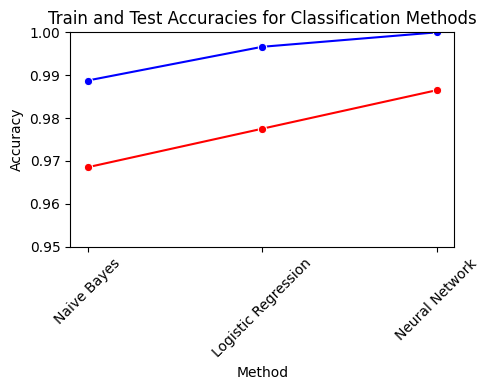

In [137]:
train_accuracies_data = {
    'Method': ['Naive Bayes', 'Logistic Regression', 'Neural Network'],
    'Train Accuracy': [nb_train_accuracy, lr_train_accuracy, nn_train_accuracy],
}

test_accuracies_data = {
    'Method': ['Naive Bayes', 'Logistic Regression', 'Neural Network'],
    'Test Accuracy': [nb_accuracy, lr_accuracy, nn_accuracy]
}

df_train_accuracies = pd.DataFrame(train_accuracies_data)
df_test_accuracies = pd.DataFrame(test_accuracies_data)


# Plot using Seaborn
plt.figure(figsize=(5, 4))
sns.lineplot(x='Method', y='Train Accuracy', marker='o', color='blue', data=df_train_accuracies)
sns.lineplot(x='Method', y='Test Accuracy', marker='o', color='red', data=df_test_accuracies)

plt.title('Train and Test Accuracies for Classification Methods')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1)  # Set y-axis limits to 0 and 1 for accuracy
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# **Performance of Various Classifiers**

---


The performance of the various classifiers was surprisingly high. This could have been a consequence of the dataset being rather large ( on the order of 3MB) or due to the fact that pre-processing was done well, and the tf-idf vectorizer was an effective way to vectorize processed text.

Additionally the performances of the various classifiers in relation to each other was also surprising. The Neural Network attained a significantly higher level of accuracy than the Naive Bayes or Logistic Regression classifiers. I had predicted that this would not be the case, since Naive Bayes and Logistic Regression are probability distributions and therefore more suited to classification problems. The Neural Network on the other hand is also more susceptible to overfitting, due to the large width of the hidden layer.

The Naive Bayes Classifier ended up with a training error around 98% and a testing error around 97%. The Logistic Regression Classifier ended up outperforming Naive Bayes with a training error around 99.6% and a testing error around 98%. The Neural Network outperformed both of the other classifiers with a training error either incredibly close to 100% or exactly 100% and a testing error around 99.1%. This Neural Network training accuracy was probably a consequence of a large amount of iterations ( the max being 1000 ) and the hidden layer having a width of a 100 perceptrons.